In [1]:
import os
os.chdir('P:\SAMPLE DATA')

In [2]:
df=pd.read_excel('2016.xlsx')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

In [8]:
df.head()

CMemNo              Description Failed    InvDate InvPaymentDate  \
0  662914  Monthly Mobile Contract    NaN 2011-07-25     2016-07-26   
1  662914  Monthly Mobile Contract    NaN 2011-10-25     2016-07-26   
2  693482      Miscellaneous Items    NaN 2012-03-01     2017-01-26   
3  663686      Miscellaneous Items    NaN 2012-09-11     2016-06-26   
4  671350      Miscellaneous Items    NaN 2012-10-19     2016-07-26   

         ProdCategory ProdCode   ProductAreaName  SuppID  InvNet (SUM)  \
0              Mobile   MS-MOB          Telecoms  O00001       -120.30   
1              Mobile   MS-MOB          Telecoms  O00001        -73.37   
2  General - Supplies  MS-MISC  General Supplies  W00052       -100.00   
3  General - Supplies  MS-MISC  General Supplies  W00052       -100.00   
4  General - Supplies  MS-MISC  General Supplies  W00052       -100.00   

       Member Type         Town Member Join Date  
0  Agrevise - Full  Northampton       2008-05-08  
1  Agrevise - Full  Northampton       2008-05-08  
2             Full  King's Lynn       1997-03-20  
3      2nd Account     Spalding       2011-06-08  
4             Full      Norwich       1990-02-20

In [12]:
df.shape

(591933, 13)

In [20]:
df.isnull().sum()

CMemNo              0
payment             0
InvDate             0
InvPaymentDate      0
ProdCategory        1
ProdCode            1
ProductAreaName     1
InvNet (SUM)        1
Member Type         0
Town                0
Member Join Date    0
Time for payment    0
dtype: int64

In [5]:
df.dtypes

CMemNo                       int64
Description                 object
Failed                      object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
SuppID                      object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
dtype: object

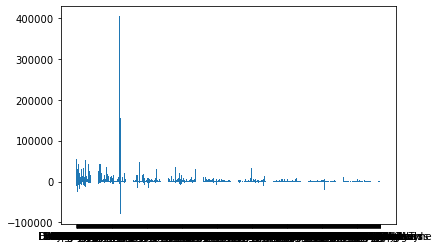

In [6]:
town=df['Town']
sales=df['InvNet (SUM)']
plt.bar(town,sales)
plt.show()

In [14]:
df['Time for payment'] = (df['InvPaymentDate'] - df['InvDate']).dt.days

In [15]:
df.drop(['Description','SuppID'], axis=1, inplace=True)

In [21]:
df.dropna(inplace=True)

In [16]:
df.shape

(591933, 12)

In [18]:
df.rename(columns={'Failed':'payment'}, inplace=True)

In [19]:
df['payment']=df['payment'].fillna('success')

In [31]:
#df['Description'].unique()

In [32]:
df['ProdCategory'].unique()

array(['Mobile', 'General - Supplies', 'Liquid', 'Agrochemicals',
       'Non HH, mains gas, MOP', 'Building Materials',
       'LPG & Solid fuels', 'Livestock Products', 'Electricity HH',
       'Tyres', 'General - Machinery', 'Hire',
       'Vet fees & Animal Health / Semen', 'Fixed & Broadband',
       'Non Levy', 'Feed', 'Insurance', 'Hardware', 'Seed', 'Fuel Cards',
       'Fertiliser', 'General Services', 'Renewable Services',
       'Agrochemicals Non Levy', 'Rodenticides', 'Accounts',
       'General Supplies Non Levy', 'Rebates to Members', 'Labour',
       'Capital', 'Tractor Hire', 'Build Materials Non Levy',
       'Seed Non Levy', 'Charge card', 'Liquid 10,000Ltrs+', nan],
      dtype=object)

In [22]:
subset = df.sample(n=100000)

In [23]:
subset.reset_index(inplace=True)

In [24]:
subset.drop('index', axis=1, inplace=True)

In [25]:
subset.shape

(100000, 12)

In [26]:
df=subset.copy()

In [27]:
df1=subset.copy()

In [28]:
df.dtypes

CMemNo                       int64
payment                     object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
Time for payment             int64
dtype: object

custom_pipeline = [preprocessing.fillna,
                   #preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   #preprocessing.remove_brackets
                  ]
df['clean_text'] = hero.clean(df['Description'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]

In [39]:
df

CMemNo  payment    InvDate InvPaymentDate        ProdCategory  \
0       662914  success 2011-07-25     2016-07-26              Mobile   
1       662914  success 2011-10-25     2016-07-26              Mobile   
2       693482  success 2012-03-01     2017-01-26  General - Supplies   
3       663686  success 2012-09-11     2016-06-26  General - Supplies   
4       671350  success 2012-10-19     2016-07-26  General - Supplies   
...        ...      ...        ...            ...                 ...   
591928  663975  success 2017-12-31     2017-02-26   LPG & Solid fuels   
591929  663975  success 2017-12-31     2017-02-26   LPG & Solid fuels   
591930  663975  success 2017-12-31     2017-02-26   LPG & Solid fuels   
591931  693468  success 2017-12-31     2017-02-26   LPG & Solid fuels   
591932  693468  success 2017-12-31     2017-02-26   LPG & Solid fuels   

         ProdCode   ProductAreaName  InvNet (SUM)      Member Type  \
0          MS-MOB          Telecoms       -120.30  Agrevise - Full   
1          MS-MOB          Telecoms        -73.37  Agrevise - Full   
2         MS-MISC  General Supplies       -100.00             Full   
3         MS-MISC  General Supplies       -100.00      2nd Account   
4         MS-MISC  General Supplies       -100.00             Full   
...           ...               ...           ...              ...   
591928  GS-PROP13  LPG & Solid Fuel         40.80             Full   
591929  GS-PROP19  LPG & Solid Fuel         20.02             Full   
591930  GS-PROP47  LPG & Solid Fuel         40.75             Full   
591931    GS-DELY  LPG & Solid Fuel          4.76        Associate   
591932  GS-PROP47  LPG & Solid Fuel         81.50        Associate   

               Town Member Join Date  Time for payment  
0       Northampton       2008-05-08              1828  
1       Northampton       2008-05-08              1736  
2       King's Lynn       1997-03-20              1792  
3          Spalding       2011-06-08              1384  
4           Norwich       1990-02-20              1376  
...             ...              ...               ...  
591928      Ipswich       2012-07-06              -308  
591929      Ipswich       2012-07-06              -308  
591930      Ipswich       2012-07-06              -308  
591931   Kings Lynn       1986-02-27              -308  
591932   Kings Lynn       1986-02-27              -308  

[591932 rows x 12 columns]

In [72]:
#df1['tfidf'] = (hero.tfidf(df1['clean_text'], max_features=3000))

In [31]:
df2.dtypes

CMemNo                       int64
payment                     object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
Time for payment             int64
dtype: object

In [30]:
df2=df1.copy()

In [24]:
#from datetime import datetime

In [27]:
#df2['Time for payment'] = (df2['InvPaymentDate'] - df2['InvDate']).dt.days

In [43]:
df2.shape

(100000, 12)

In [32]:
df2.tail()

CMemNo  payment    InvDate InvPaymentDate        ProdCategory  \
99995  662273  success 2016-09-30     2016-10-28          Fuel Cards   
99996  662383  success 2016-04-30     2016-05-26  Rebates to Members   
99997  663587  success 2016-09-07     2016-10-26   Fixed & Broadband   
99998  671001  success 2016-06-23     2016-07-26       Agrochemicals   
99999  663463  success 2016-02-23     2016-03-26  Building Materials   

       ProdCode     ProductAreaName  InvNet (SUM) Member Type      Town  \
99995   FL-CARD          Fuel Cards         85.41        Full   Beccles   
99996    MS-REB             Rebates        -35.42        Full   Wisbech   
99997   MS-TELE            Telecoms         20.16   Associate  Fakenham   
99998  CH-TERP5     Crop Protection      -1020.00        Full   Norwich   
99999    BU-GEN  Building Materials         93.95       Staff   Norwich   

      Member Join Date  Time for payment  
99995       2006-02-16                28  
99996       2006-09-07                26  
99997       2011-02-17                49  
99998       1990-01-01                33  
99999       2010-08-19                32

In [380]:
#df2.drop(['clean_text','index'],axis=1, inplace=True)

In [386]:
#df2.reset_index(inplace=True)

In [287]:
#train_data=df2.iloc[:80000,:]

In [288]:
#test_data = df2.drop(train_data.index)

In [33]:
df2.drop(['Description','SuppID'],axis=1, inplace=True)

In [34]:
df2.isnull().sum()

CMemNo              0
payment             0
InvDate             0
InvPaymentDate      0
ProdCategory        0
ProdCode            0
ProductAreaName     0
InvNet (SUM)        0
Member Type         0
Town                0
Member Join Date    0
Time for payment    0
dtype: int64

([<matplotlib.patches.Wedge at 0x1a205a7ddf0>,
 [Text(-0.013981880828796351, -1.0999111359598508, 'success'),
  Text(0.015252997766699106, 1.1999030569421554, 'Failed')],
 [Text(-0.0076264804520707365, -0.5999515287053732, '99.6%'),
  Text(0.008897582030574478, 0.6999434498829239, '0.4%')])

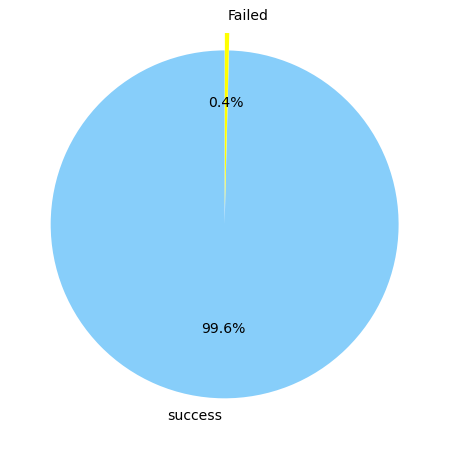

In [45]:
plt.rcParams['figure.figsize']=8,8
labels=df['payment'].value_counts().index.tolist()
sizes=df['payment'].value_counts().tolist()
explode=(0,0.1)
colors=['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})

In [32]:
df.shape

(100000, 12)

([<matplotlib.patches.Wedge at 0x1179cc48fa0>,
 [Text(-0.014202672051304849, -1.099908307135919, 'success'),
  Text(0.015493743309622561, 1.199899972463645, 'Failed')],
 [Text(-0.007746912027984462, -0.5999499857105013, '99.6%'),
  Text(0.009038016930613159, 0.6999416506037928, '0.4%')])

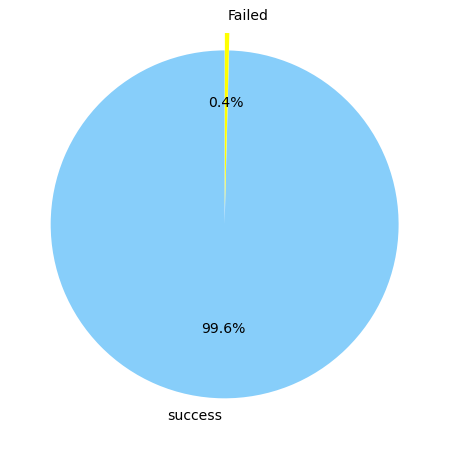

In [33]:
plt.rcParams['figure.figsize']=8,8
labels=df2['payment'].value_counts().index.tolist()
sizes=df2['payment'].value_counts().tolist()
explode=(0,0.1)
colors=['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})

In [34]:
df2['ProductAreaName'].groupby(df2['payment']).describe()

count unique        top   freq
payment                                
Failed     411     17  Machinery    128
success  99589     21  Machinery  20154

In [51]:
df2['ProductAreaName'].groupby(df2['Town']).describe()

count unique                               top  freq
Town                                                                        
.                           1      1                Non Service Charge     1
70 Orford Road             12      5                   Crop Protection     7
Aberdeen                    1      1                Non Service Charge     1
Abergavenny                23     10  Feed & Animal Health & Vets Fees     5
Aberystwyth                39      5                        Fuel Cards    16
Abingdon                  130     16                   Crop Protection    21
Aboyne                     41      9                        Fuel Cards    17
Acle                       14      7                          Telecoms     5
Aldeburgh                  11      4                          Telecoms     7
Aldeby                     12      3                Building Materials    10
Alexandria                 12      3                Livestock Products     6
Alford                      9      6                          Telecoms     4
Allteborough                1      1                         Insurance     1
Alness                      1      1                         Machinery     1
Alnwick                     4      2    Non HH Electricity & Mains Gas     3
Alton                       4      1                          Telecoms     4
Ambleside                   7      4                        Fuel Cards     4
Annan                      12      4  Feed & Animal Health & Vets Fees     5
Appleby                     3      1    Non HH Electricity & Mains Gas     3
Arbroath                    8      2                   Crop Protection     7
Ardersier                   6      3                Livestock Products     3
Ashbourne                  17      6                          Telecoms     7
Ashkirk                     1      1    Non HH Electricity & Mains Gas     1
Ashwellthorpe              33      7                  General Supplies    13
Aspatria                    6      2                          Telecoms     5
Atherstone                  3      2                   Crop Protection     2
Attleborough             1790     20                         Machinery   381
Attlebridge                19      7                         Machinery     7
Auchenheath                 7      3                Livestock Products     4
Auldgirth                   1      1    Non HH Electricity & Mains Gas     1
Austwick                    8      3                Livestock Products     3
Aylesbury                  87     16                          Telecoms    20
Aylesford                  13      1                          Telecoms    13
Aylsham                   299     16                Building Materials    87
Ayr                        53      8  Feed & Animal Health & Vets Fees    18
Bakewell                   33     10                Non Service Charge     8
Balsham                     1      1                  General Supplies     1
Bampton                    58      8                   Crop Protection    32
Banbury                    61      9                  General Supplies    13
Banham                     16      3                         Machinery     9
Barnard Castle              1      1                           Rebates     1
Barnsley                    7      3                Building Materials     4
Barnstaple                  1      1                   Crop Protection     1
Bartlow                    30     11                          Telecoms     7
Basildon                    8      3                  General Supplies     6
Bathford                   14      3                   Crop Protection    10
Bathgate                    1      1    Non HH Electricity & Mains Gas     1
Bawburgh                    1      1                Building Materials     1
Bawdeswell                 79      9                   Crop Protection    37
Beaconsfield               17      3                       Liquid Fuel     9
Bearpark            

In [54]:
pd.set_option('display.max_rows', None)

In [55]:
d=df2['ProductAreaName'].groupby(df2['Town']).describe()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment', ylabel='count'>

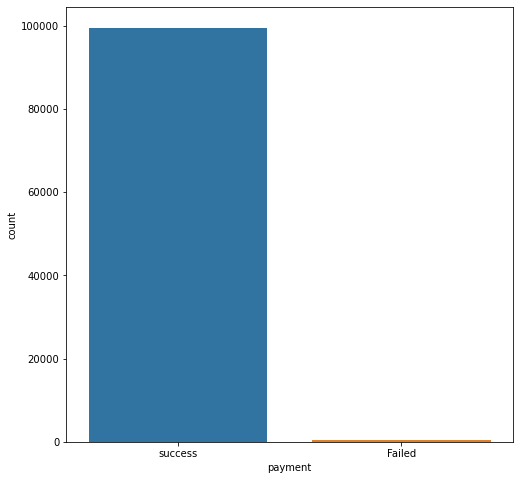

In [57]:
#count plot for declined payment

df2['payment']=df2.payment.replace([1,0],['success','Failed'])
paymentrate=df2['payment']
sns.countplot(paymentrate)

In [60]:
df['ProdCategory'].unique()

array(['Fixed & Broadband', 'Fuel Cards', 'Rebates to Members',
       'General - Machinery', 'Seed', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Agrochemicals', 'Mobile',
       'Building Materials', 'Charge card', 'Electricity HH',
       'Livestock Products', 'Hardware', 'Tyres', 'Liquid', 'Fertiliser',
       'Feed', 'Labour', 'Accounts', 'Insurance', 'LPG & Solid fuels',
       'Vet fees & Animal Health / Semen', 'Agrochemicals Non Levy',
       'Hire', 'General Services', 'Non Levy', 'Tractor Hire', 'Capital',
       'Liquid 10,000Ltrs+', 'Rodenticides', 'Renewable Services',
       'General Supplies Non Levy', 'Build Materials Non Levy',
       'Seed Non Levy'], dtype=object)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

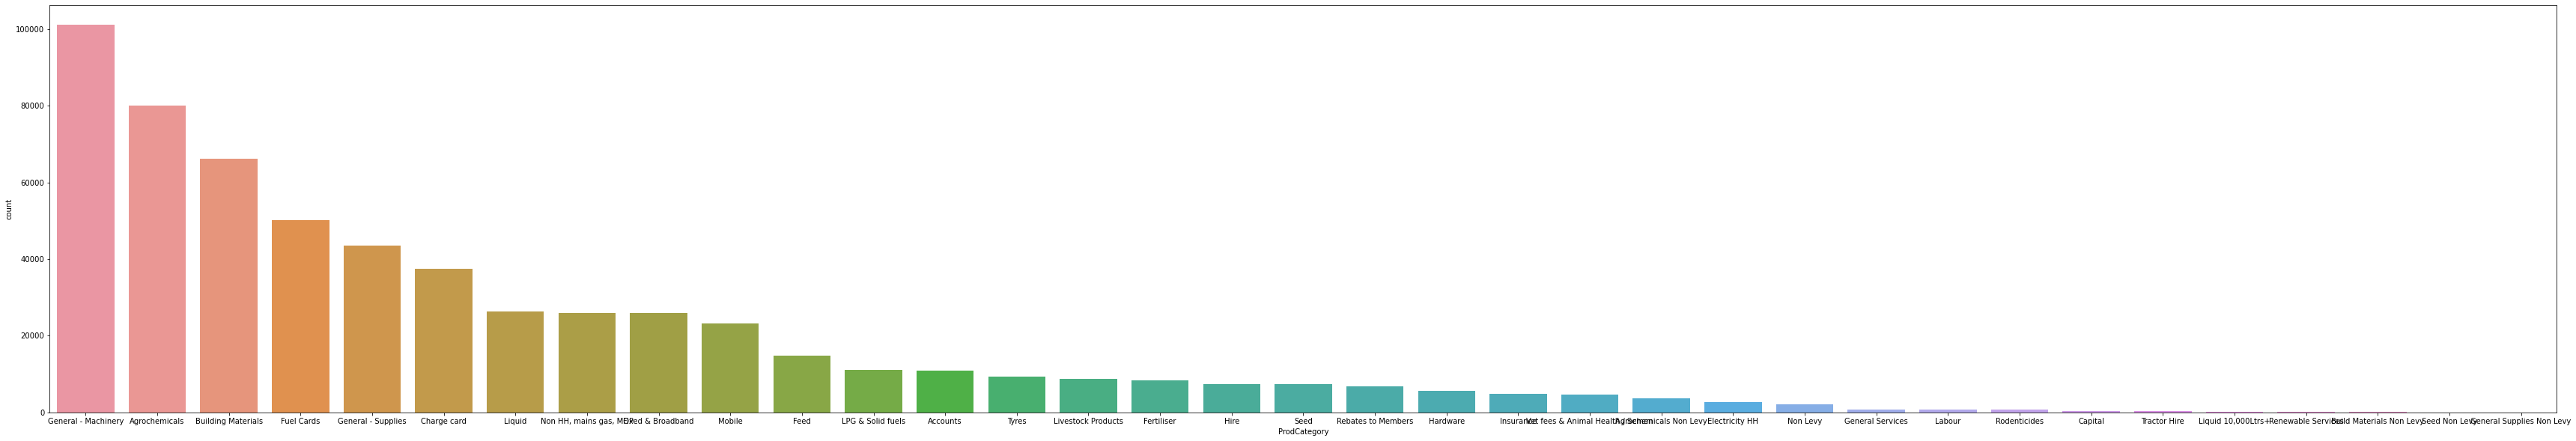

In [136]:
plt.figure(figsize=(60,10))
paymentrate=df['ProdCategory']
sns.countplot(paymentrate,order = df['ProdCategory'].value_counts().index)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

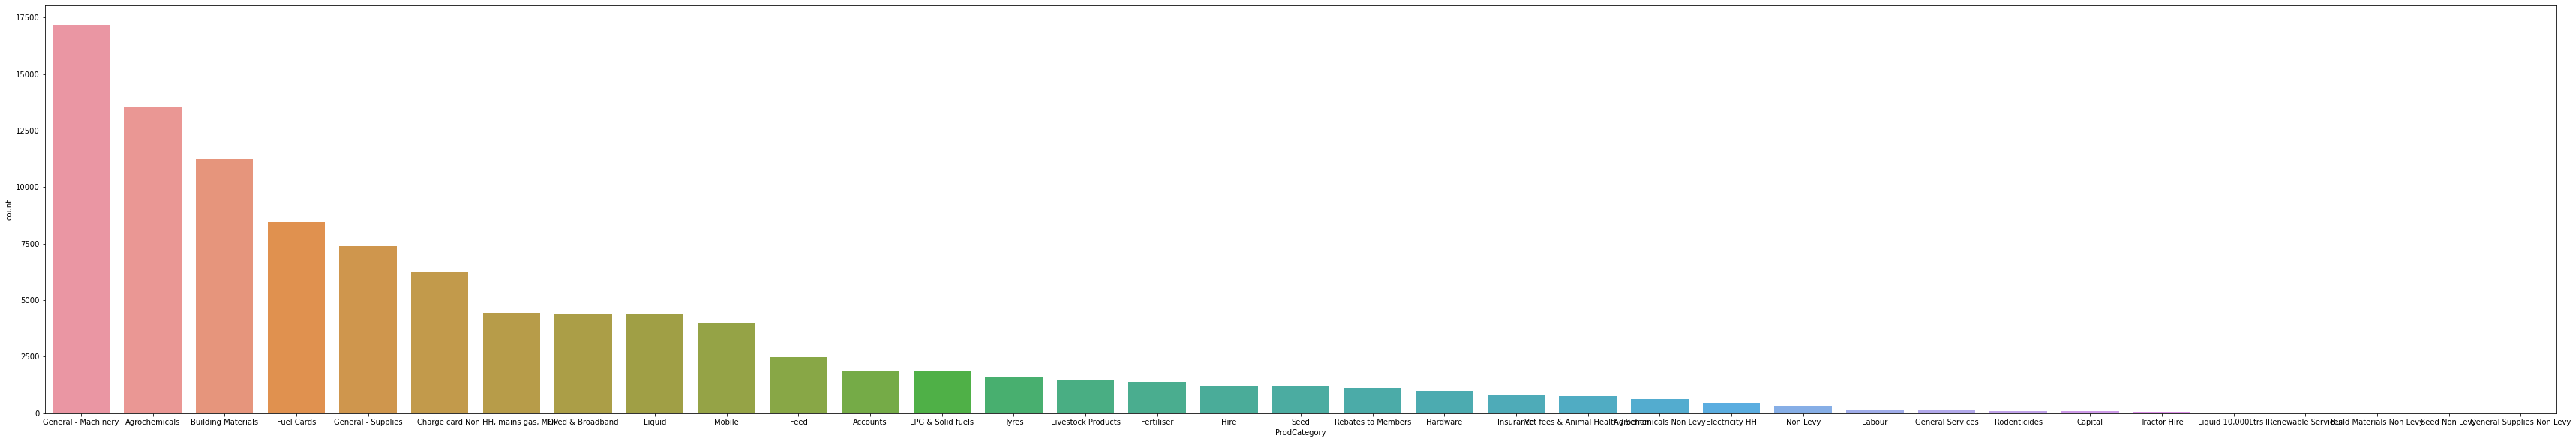

In [135]:
plt.figure(figsize=(60,10))
paymentrate=df2['ProdCategory']
sns.countplot(paymentrate,order = df2['ProdCategory'].value_counts().index)

In [66]:
df.shape

(100000, 13)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ProductAreaName', ylabel='count'>

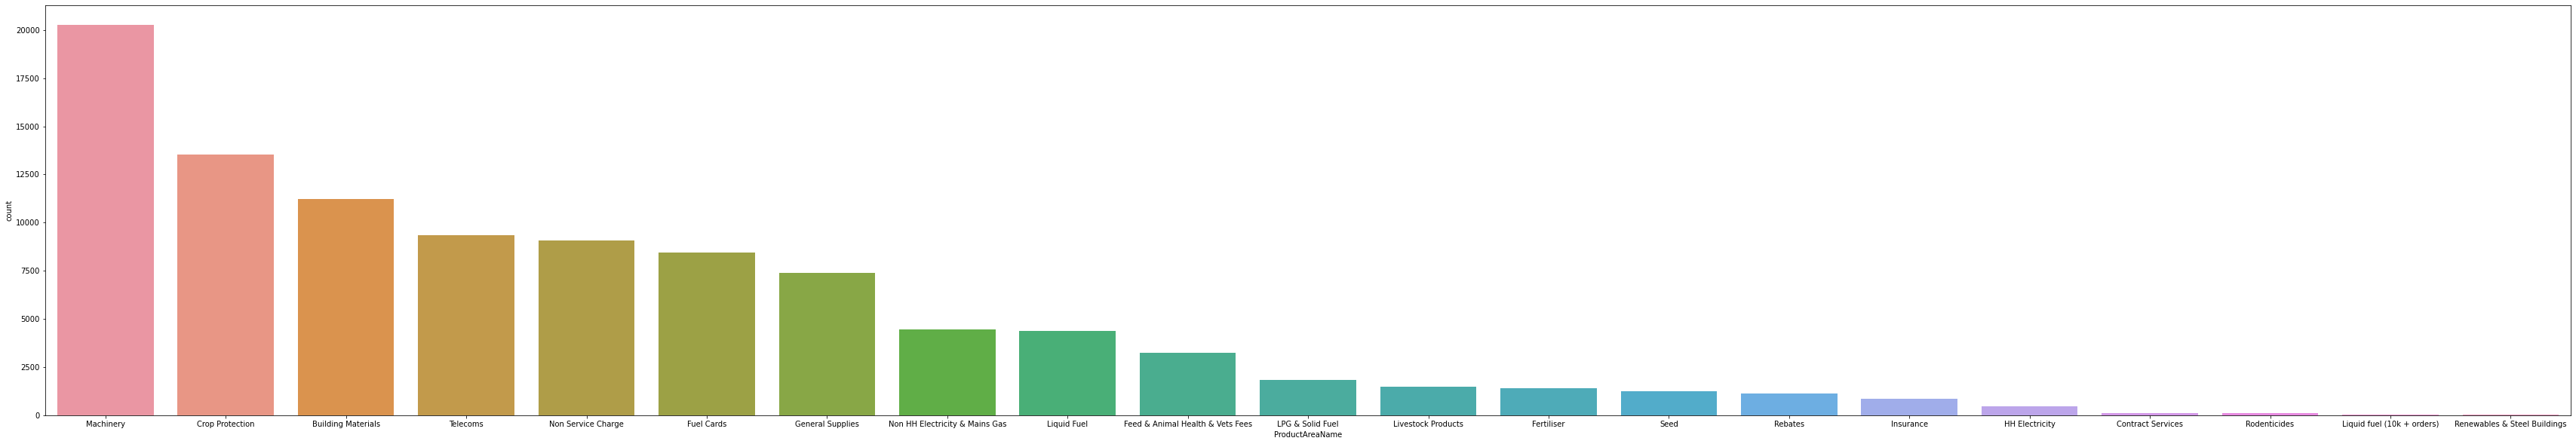

In [134]:
plt.figure(figsize=(60,10))
paymentrate=df2['ProductAreaName']
sns.countplot(paymentrate, order = df2['ProductAreaName'].value_counts().index)

In [47]:
df2.head(2)

CMemNo  payment    InvDate InvPaymentDate        ProdCategory ProdCode  \
0  661988  success 2016-10-06     2016-11-26  Building Materials   BU-GEN   
1  664319  success 2016-05-16     2016-06-26              Mobile   MS-MOB   

      ProductAreaName  InvNet (SUM)                          Member Type  \
0  Building Materials        291.51                          2nd Account   
1            Telecoms         90.04  Waitrose Farming Partnership - Full   

          Town Member Join Date  Time for payment  
0      Norwich       2003-12-02                51  
1  Ross-On-Wye       2013-04-10                41

<AxesSubplot:xlabel='count', ylabel='Town'>

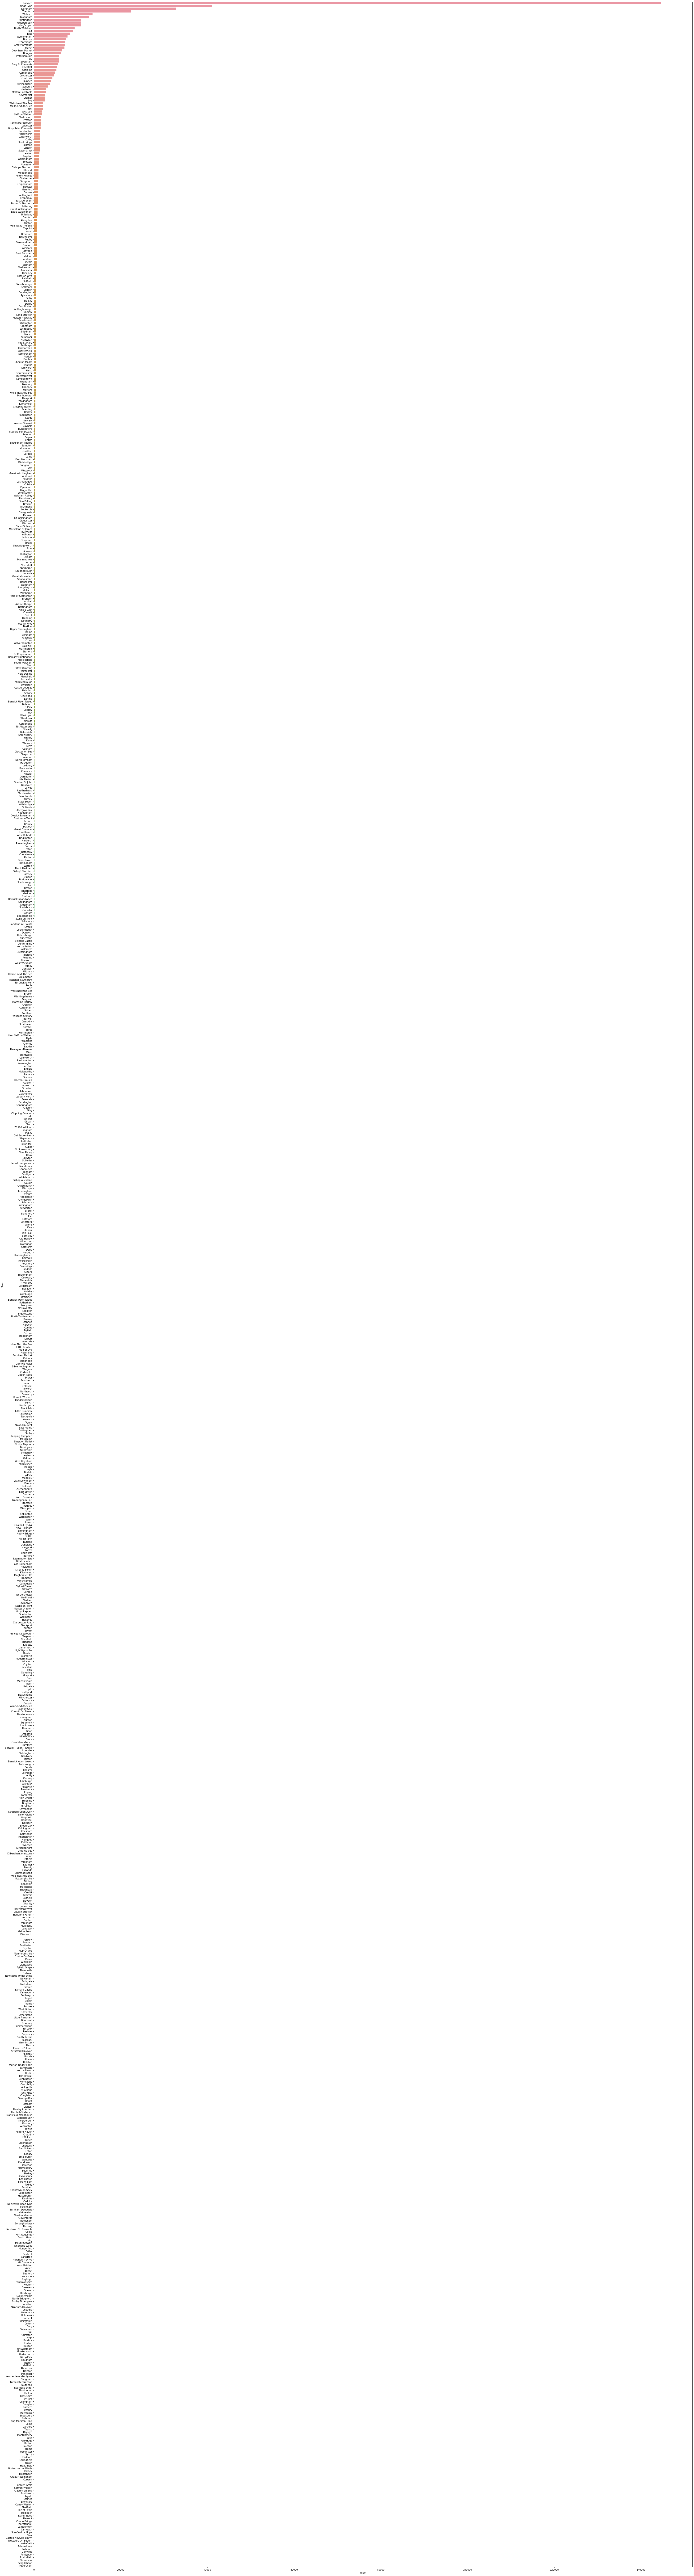

In [59]:
plt.figure(figsize=(50,200))
paymentrate=df['Town']
sns.countplot(y=paymentrate, order = df['Town'].value_counts().index, orient="H")

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ProductAreaName', ylabel='count'>

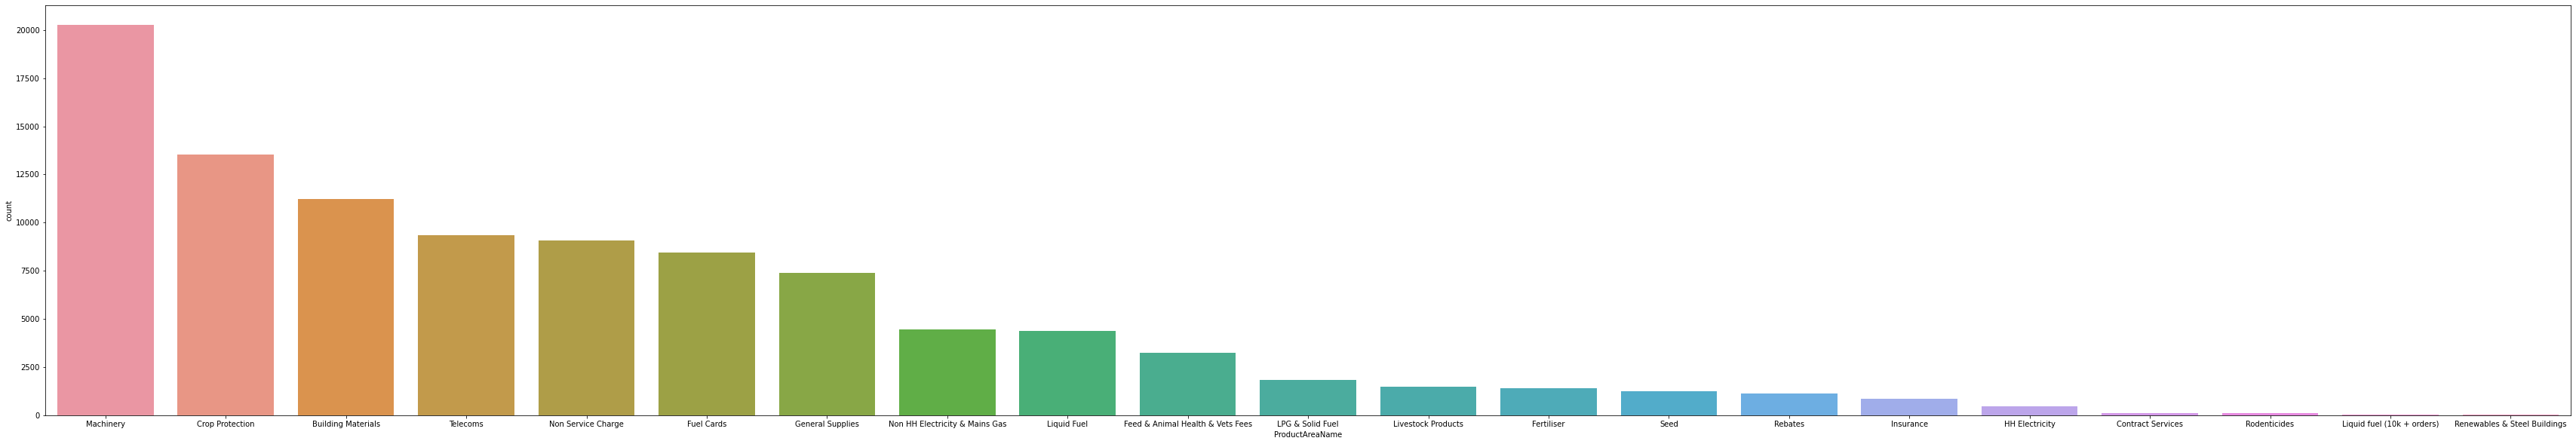

In [134]:
plt.figure(figsize=(60,10))
paymentrate=df2['ProductAreaName']
sns.countplot(paymentrate, order = df2['ProductAreaName'].value_counts().index)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Member Type', ylabel='count'>

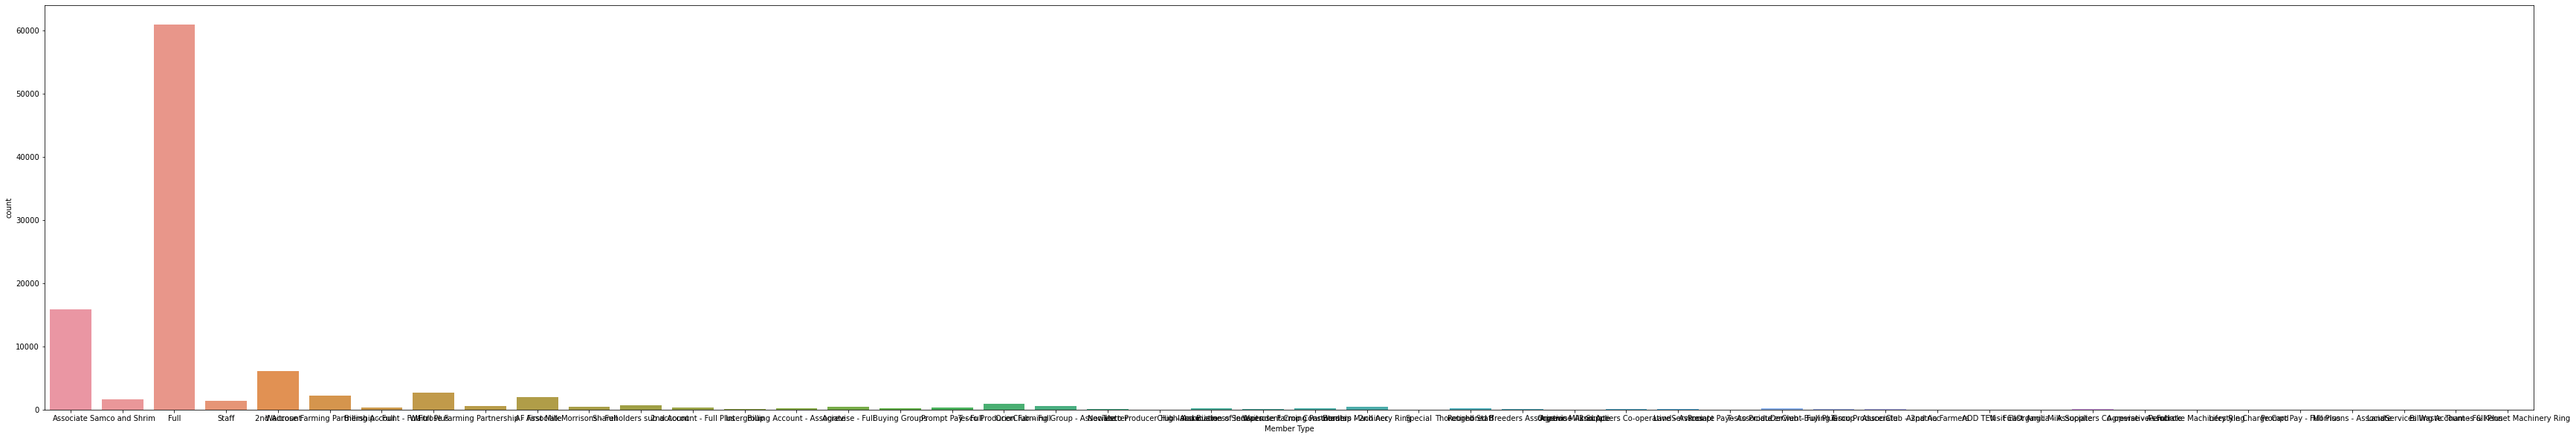

In [85]:
plt.figure(figsize=(60,10))
paymentrate=df2['Member Type']
sns.countplot(paymentrate)

In [5]:
d=df.groupby(["Failed", "Member Type"])["ProductAreaName"].agg(["value_counts"])

In [7]:
d

value_counts
Failed Member Type                                 ProductAreaName                               
Failed 2nd Account                                 Building Materials                          75
                                                   Crop Protection                             22
                                                   Non Service Charge                          14
                                                   Machinery                                    9
                                                   Liquid Fuel                                  5
                                                   Fertiliser                                   3
       Agrevise - Full                             Telecoms                                     6
                                                   Building Materials                           2
                                                   LPG & Solid Fuel                             1
                                                   Non Service Charge                           1
       Associate                                   Machinery                                  156
                                                   Building Materials                         144
                                                   Fuel Cards                                 108
                                                   Non Service Charge                          84
                                                   General Supplies                            61
                                                   Feed & Animal Health & Vets Fees            44
                                                   Telecoms                                    41
                                                   Liquid Fuel                                 34
                                                   Crop Protection                             26
                                                   LPG & Solid Fuel                            12
                                                   Livestock Products                          10
                                                   Non HH Electricity & Mains Gas              10
                                                   Contract Services                            4
                                                   Rebates                                      4
                                                   Insurance                                    3
                                                   Seed                                         2
                                                   Fertiliser                                   1
                                                   Rodenticides                                 1
       Association of Independent Crop Consultants Fuel Cards                                  21
                                                   Building Materials                           7
                                                   Telecoms                                     5
                                                   Non Service Charge                           2
                                                   Machinery                                    1
       Full                                        Machinery                                  510
                                                   Crop Protection                            240
                                                   Fuel Cards                                 160
                                                   Non Service Charge                          94
                                                   Building Materials                          76
                                                   Feed & Animal Health & Vets Fees            69
                                                   Liquid Fuel     

In [6]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(d)

                                                                                     value_counts
Failed Member Type                                 ProductAreaName                               
Failed 2nd Account                                 Building Materials                          75
                                                   Crop Protection                             22
                                                   Non Service Charge                          14
                                                   Machinery                                    9
                                                   Liquid Fuel                                  5
                                                   Fertiliser                                   3
       Agrevise - Full                             Telecoms                                     6
                                                   Building Materials                           2
                    

In [95]:
county=df2[df2['payment']=='Failed'].groupby(['Town']).size().reset_index(name='count')

In [107]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(county)

               Town  count
0       Aberystwyth      1
1      Attleborough      5
2           Beccles     10
3          Bridport      4
4            Bungay      5
5   Bury St Edmunds      4
6           Dereham     68
7              Diss      3
8    Downham Market     10
9      East Dereham      9
10              Ely      5
11         Fakenham      8
12  Flyford Flavell      2
13       Halesworth      9
14        Harleston     11
15       Huntingdon     15
16        Kettering      1
17      King's Lynn     75
18       Kings Lynn     51
19        Leicester      1
20          Norfolk      1
21          Norwich     82
22    Old Buckenham      3
23     Peterborough      5
24           Ramsey      1
25         Richmond      7
26   Saffron Walden     12
27         Shipdham      7
28    South Ruislip      1
29         Thetford     11
30          Wisbech      6


In [111]:
county=df2[df2['payment']=='success'].groupby(['Town']).size().reset_index(name='count')

In [112]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(county)

                       Town  count
0                         .      1
1            70 Orford Road     12
2                  Aberdeen      1
3               Abergavenny     23
4               Aberystwyth     38
5                  Abingdon    130
6                    Aboyne     41
7                      Acle     14
8                 Aldeburgh     11
9                    Aldeby     12
10               Alexandria     12
11                   Alford      9
12             Allteborough      1
13                   Alness      1
14                  Alnwick      4
15                    Alton      4
16                Ambleside      7
17                    Annan     12
18                  Appleby      3
19                 Arbroath      8
20                Ardersier      6
21                Ashbourne     17
22                  Ashkirk      1
23            Ashwellthorpe     33
24                 Aspatria      6
25               Atherstone      3
26             Attleborough   1785
27              Attl

In [100]:
#import plotly.express as px

In [104]:
#px.choropleth(county,
                    #locations = "country",
                    #color= "count", 
                    #hover_name= "country", # column to add to hover information
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    #title="f visitors")

In [33]:
#day diff for the first payment is member join date to the invdate
df2['first invoice']=(df2['InvDate']-df2['Member Join Date']).dt.days

In [34]:
#day diff between the payment made and membershit join date is considered to be the payment date
df2['payment date']=(df2['InvPaymentDate']-df2['Member Join Date']).dt.days

In [35]:
#month of the invoice 
df2["invoiced month"] = pd.to_datetime(df2["InvDate"], format = "%d/%m/%Y").dt.month

In [36]:
#payment month
df2['month of payment']=pd.to_datetime(df2["InvPaymentDate"], format="%d/%m/%Y").dt.month

In [37]:
#members joined year and month
df2['year of joning']=pd.to_datetime(df2["Member Join Date"], format="%d/%m/%Y").dt.year
df2['month of joining']=pd.to_datetime(df2["Member Join Date"], format="%d/%m/%Y").dt.month
df2['day of joining']=pd.to_datetime(df2["Member Join Date"], format="%d/%m/%Y").dt.day

In [38]:
df2['date of invoicing']=pd.to_datetime(df2["InvDate"], format="%d/%m/%Y").dt.day

In [39]:
df2['date of payment']=pd.to_datetime(df2["InvPaymentDate"], format="%d/%m/%Y").dt.day

<AxesSubplot:xlabel='year of joning', ylabel='count'>

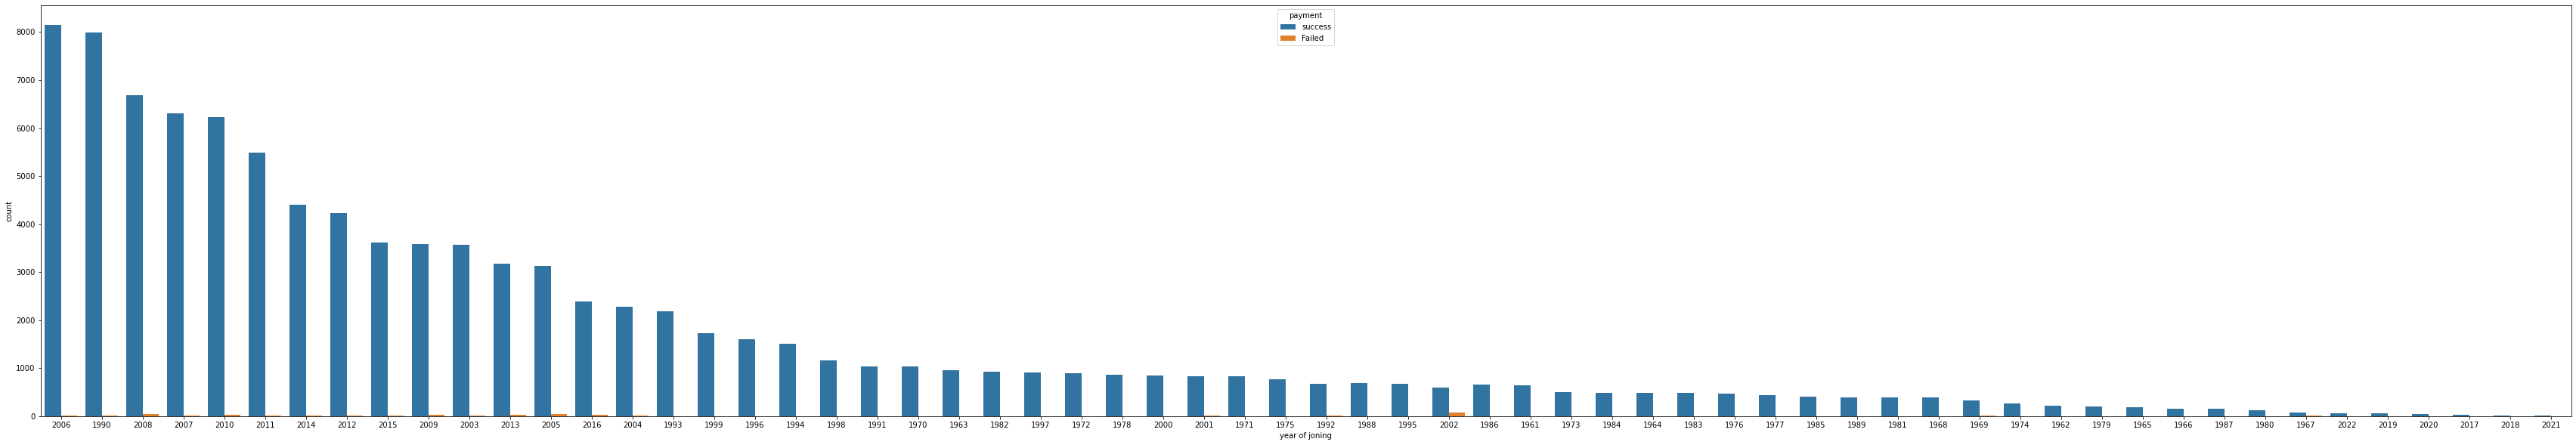

In [133]:
plt.figure(figsize=(60,10))
sns.countplot(x='year of joning', hue='payment', data=df2,order = df2['year of joning'].value_counts().index)

<AxesSubplot:xlabel='day of joining', ylabel='count'>

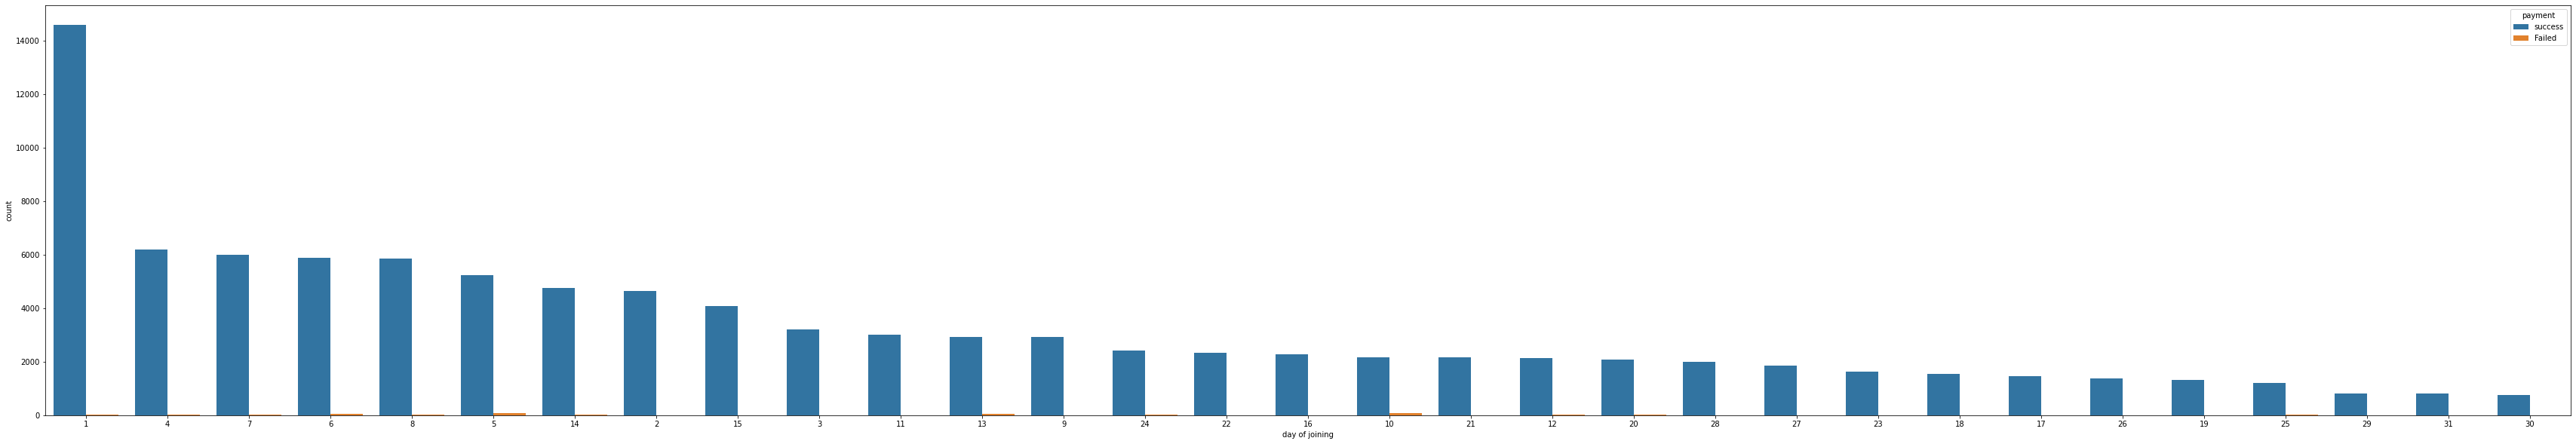

In [132]:
plt.figure(figsize=(60,10))
sns.countplot(x='day of joining', hue='payment', data=df2, order = df2['day of joining'].value_counts().index)

In [140]:
df2['Member Type'].value_counts()

Full                                               60913
Associate                                          15897
2nd Account                                         6080
Full Plus                                           2704
Waitrose Farming Partnership - Full                 2240
AF First Milk                                       1958
Samco and Shrim                                     1602
Staff                                               1332
Tesco ProducerClub – Full                            942
Shareholders sub account                             631
Orion Farming Group - Associate                      618
Waitrose Farming Partnership - Associate             594
Agrevise - Full                                      501
Morrisons - Full                                     487
Borders Machinery Ring                               480
Prompt Pay - Full                                    349
Billing Account - Full                               334
2nd Account - Full Plus        

In [43]:
df2

CMemNo  payment    InvDate InvPaymentDate         ProdCategory  \
0      693149  success 2016-04-30     2016-05-28           Fuel Cards   
1      640105  success 2016-05-05     2016-06-30        Agrochemicals   
2      671765  success 2016-06-30     2016-07-28        Agrochemicals   
3      671321  success 2016-10-21     2016-11-21  General - Machinery   
4      693282  success 2016-06-02     2016-06-26          Charge card   
...       ...      ...        ...            ...                  ...   
99995  662218  success 2016-03-21     2016-04-26   Building Materials   
99996  613433  success 2016-06-23     2016-08-26   General - Supplies   
99997  615049  success 2016-09-22     2016-10-26           Fertiliser   
99998  617466  success 2017-01-03     2017-01-26       Electricity HH   
99999  681044  success 2016-11-30     2016-12-26           Fuel Cards   

             ProdCode     ProductAreaName  InvNet (SUM)  \
0             FL-CARD          Fuel Cards         55.00   
1           CH-STAB15     Crop Protection         51.00   
2          CH-SLUXX20     Crop Protection        227.40   
3               MC-MS           Machinery          2.12   
4      MS-BARCLAYCARD  Non Service Charge         47.00   
...               ...                 ...           ...   
99995          BU-GEN  Building Materials        -18.50   
99996         MS-MISC    General Supplies         18.49   
99997       FT-TSP600          Fertiliser       4065.00   
99998   MS-HHELECTRIC      HH Electricity        821.99   
99999         FL-CARD          Fuel Cards        245.15   

                       Member Type            Town  ... Time for payment  \
0                             Full      Kings Lynn  ...               28   
1                             Full    Peterborough  ...               56   
2                             Full         Norwich  ...               28   
3                             Full         Norwich  ...               31   
4                             Full         Norwich  ...               24   
...                            ...             ...  ...              ...   
99995                         Full        Spalding  ...               36   
99996                         Full      Colchester  ...               64   
99997              Samco and Shrim  Saffron Walden  ...               34   
99998  Billing Account - Associate           March  ...               23   
99999                AF First Milk  Newton Stewart  ...               26   

       first invoice  payment date  invoiced month  month of payment  \
0               8076          8104               4                 5   
1               3596          3652               5                 6   
2               6686          6714               6                 7   
3               9790          9821              10                11   
4              11619         11643               6                 6   
...              ...           ...             ...               ...   
99995           3821          3857               3                 4   
99996           1910          1974               6                 8   
99997           3737          3771               9                10   
99998           1019          1042               1                 1   
99999           2353          2379              11                12   

       year of joning  month of joining  day of joining  date of invoicing  \
0                1994                 3              21                 30   
1                2006                 7               1                  5   
2                1998                 3              11                 30   
3                1990                 1               1                 21   
4                1984                 8              10                  2   
...               ...               ...             ...                ...   
99995            2005                10               4                 21   
99996            20

In [146]:
df2.columns

Index(['CMemNo', 'payment', 'InvDate', 'InvPaymentDate', 'ProdCategory',
       'ProdCode', 'ProductAreaName', 'InvNet (SUM)', 'Member Type', 'Town',
       'Member Join Date', 'Time for payment', 'first invoice', 'payment date',
       'invoiced month', 'month of payment', 'year of joning',
       'month of joining', 'day of joining', 'date of invoicing',
       'date of payment'],
      dtype='object')

In [40]:
df2.drop(['InvDate','InvPaymentDate','ProdCode','Member Join Date'], axis=1, inplace=True)

In [45]:
df2.dtypes

CMemNo                 int64
payment               object
ProdCategory          object
ProductAreaName       object
InvNet (SUM)         float64
Member Type           object
Town                  object
Time for payment       int64
first invoice          int64
payment date           int64
invoiced month         int64
month of payment       int64
year of joning         int64
month of joining       int64
day of joining         int64
date of invoicing      int64
date of payment        int64
dtype: object

In [41]:
df3=df2.copy()

In [42]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [43]:
# define data
data = asarray(df2['Town']).reshape(-1,1)
print(data)


[['Norwich']
 ['Thetford']
 ['Lutterworth']
 ...
 ['Fakenham']
 ['Norwich']
 ['Norwich']]


In [44]:
# define ordinal encoding
encoder = OrdinalEncoder()

In [45]:
# transform data
result = encoder.fit_transform(data)
print(result)

[[544.]
 [714.]
 [465.]
 ...
 [263.]
 [544.]
 [544.]]


In [46]:
result=pd.DataFrame(result)

In [47]:
df2=pd.concat([df2,result], axis=1)

In [48]:
df2.columns = [*df2.columns[:-1], 'Town']

In [49]:
df2

CMemNo  payment         ProdCategory     ProductAreaName  InvNet (SUM)  \
0      662670  success           Fuel Cards          Fuel Cards          1.00   
1      615203  success    Fixed & Broadband            Telecoms          0.28   
2      663084  success        Agrochemicals     Crop Protection        210.00   
3      662364  success   Livestock Products  Livestock Products         86.28   
4      693392  success  General - Machinery           Machinery        134.59   
...       ...      ...                  ...                 ...           ...   
99995  662273  success           Fuel Cards          Fuel Cards         85.41   
99996  662383  success   Rebates to Members             Rebates        -35.42   
99997  663587  success    Fixed & Broadband            Telecoms         20.16   
99998  671001  success        Agrochemicals     Crop Protection      -1020.00   
99999  663463  success   Building Materials  Building Materials         93.95   

           Member Type         Town  Time for payment  first invoice  \
0            Associate      Norwich                28           3126   
1      Samco and Shrim     Thetford                26           2039   
2      Agrevise - Full  Lutterworth                50           2949   
3          2nd Account      Dereham                64           3700   
4                 Full     Fakenham                26           8018   
...                ...          ...               ...            ...   
99995             Full      Beccles                28           3879   
99996             Full      Wisbech                26           3523   
99997        Associate     Fakenham                49           2029   
99998             Full      Norwich                33           9670   
99999            Staff      Norwich                32           2014   

       payment date  invoiced month  month of payment  year of joning  \
0              3154               2                 3            2007   
1              2065              12                 1            2011   
2              2999              11                12            2008   
3              3764               7                 9            2006   
4              8044               7                 8            1994   
...             ...             ...               ...             ...   
99995          3907               9                10            2006   
99996          3549               4                 5            2006   
99997          2078               9                10            2011   
99998          9703               6                 7            1990   
99999          2046               2                 3            2010   

       month of joining  day of joining  date of invoicing  date of payment  \
0                     8               9                 29               28   
1                     6               2                 31               26   
2                    10              15                 11               31   
3                     6               7                 24               26   
4                     8              18                 31               26   
...                 ...             ...                ...              ...   
99995                 2              16                 30               28   
99996                 9               7                 30               26   
99997                 2              17                  7               26   
99998                 1               1                 23               26   
99999                 8              19                 23               26   

        Town  
0      544.0  
1      714.0  
2      465.0  
3      210.0  
4      263.0  
...      ...  
99995   48.0  
99996  795.0  
99997  263.0  
99998  544.0  
99999  544.0  

[100000 rows x 18 columns]

In [62]:
#df2['Town'].value_counts()

In [167]:
#fe = df2.groupby("Town").size()

In [168]:
#fe_ = fe/len(df2)

In [64]:
#df2["town freq"] = df2["Town"].map(fe_).round(2)
#df2

In [63]:
#df2['Member Type'].value_counts()

In [50]:
cusdata=df2[["ProdCategory"]]

cusdata=pd.get_dummies(cusdata, drop_first=True)

cusdata.head()

ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                           0                                    0   
1                           0                                    0   
2                           1                                    0   
3                           0                                    0   
4                           0                                    0   

   ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   ProdCategory_Capital  ProdCategory_Charge card  \
0                     0                         0   
1                     0                         0   
2                     0                         0   
3                     0                         0   
4                     0                         0   

   ProdCategory_Electricity HH  ProdCategory_Feed  ProdCategory_Fertiliser  \
0                            0                  0                        0   
1                            0                  0                        0   
2                            0                  0                        0   
3                            0                  0                        0   
4                            0                  0                        0   

   ProdCategory_Fixed & Broadband  ...  ProdCategory_Non HH, mains gas, MOP  \
0                               0  ...                                    0   
1                               1  ...                                    0   
2                               0  ...                                    0   
3                               0  ...                                    0   
4                               0  ...                                    0   

   ProdCategory_Non Levy  ProdCategory_Rebates to Members  \
0                      0                                0   
1                      0                                0   
2                      0                                0   
3                      0                                0   
4                      0                                0   

   ProdCategory_Renewable Services  ProdCategory_Rodenticides  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   ProdCategory_Seed  ProdCategory_Seed Non Levy  ProdCategory_Tractor Hire  \
0                  0                           0                          0   
1                  0                           0                          0   
2                  0                           0                          0   
3                  0                           0                          0   
4                  0                           0                          0   

   ProdCategory_Tyres  ProdCategory_Vet fees & Animal Health / Semen  
0                   0                                              0  
1                   0                                              0  
2                   0                                              0  
3                   0                                              0  
4                   0                                              0  

[5 rows x 34 columns]

In [51]:
prodarea=df2[["ProductAreaName"]]

prodarea=pd.get_dummies(prodarea, drop_first=True)

prodarea.head()

ProductAreaName_Contract Services  ProductAreaName_Crop Protection  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                1   
3                                  0                                0   
4                                  0                                0   

   ProductAreaName_Feed & Animal Health & Vets Fees  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   ProductAreaName_Fertiliser  ProductAreaName_Fuel Cards  \
0                           0                           1   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   ProductAreaName_General Supplies  ProductAreaName_HH Electricity  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   ProductAreaName_Insurance  ProductAreaName_LPG & Solid Fuel  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   ProductAreaName_Liquid Fuel  ProductAreaName_Liquid fuel (10k + orders)  \
0                            0                                           0   
1                            0                                           0   
2                            0                                           0   
3                            0                                           0   
4                            0                                           0   

   ProductAreaName_Livestock Products  ProductAreaName_Machinery  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   1                          0   
4                                   0                          1   

   ProductAreaName_Non HH Electricity & Mains Gas  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   ProductAreaName_Non Service Charge  ProductAreaName_Rebates  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   ProductAreaName_Renewables & Steel Buildings  ProductAreaName_Rodenticides  \
0                                             0                             0   
1                                             0                             0   
2                                             0                             0   
3                                             0                             0   
4                                          

In [52]:
df4 = pd.concat([df2, cusdata, prodarea], axis = 1)

In [53]:
df4

CMemNo  payment         ProdCategory     ProductAreaName  InvNet (SUM)  \
0      662670  success           Fuel Cards          Fuel Cards          1.00   
1      615203  success    Fixed & Broadband            Telecoms          0.28   
2      663084  success        Agrochemicals     Crop Protection        210.00   
3      662364  success   Livestock Products  Livestock Products         86.28   
4      693392  success  General - Machinery           Machinery        134.59   
...       ...      ...                  ...                 ...           ...   
99995  662273  success           Fuel Cards          Fuel Cards         85.41   
99996  662383  success   Rebates to Members             Rebates        -35.42   
99997  663587  success    Fixed & Broadband            Telecoms         20.16   
99998  671001  success        Agrochemicals     Crop Protection      -1020.00   
99999  663463  success   Building Materials  Building Materials         93.95   

           Member Type         Town  Time for payment  first invoice  \
0            Associate      Norwich                28           3126   
1      Samco and Shrim     Thetford                26           2039   
2      Agrevise - Full  Lutterworth                50           2949   
3          2nd Account      Dereham                64           3700   
4                 Full     Fakenham                26           8018   
...                ...          ...               ...            ...   
99995             Full      Beccles                28           3879   
99996             Full      Wisbech                26           3523   
99997        Associate     Fakenham                49           2029   
99998             Full      Norwich                33           9670   
99999            Staff      Norwich                32           2014   

       payment date  ...  ProductAreaName_Liquid fuel (10k + orders)  \
0              3154  ...                                           0   
1              2065  ...                                           0   
2              2999  ...                                           0   
3              3764  ...                                           0   
4              8044  ...                                           0   
...             ...  ...                                         ...   
99995          3907  ...                                           0   
99996          3549  ...                                           0   
99997          2078  ...                                           0   
99998          9703  ...                                           0   
99999          2046  ...                                           0   

       ProductAreaName_Livestock Products  ProductAreaName_Machinery  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       1                          0   
4                                       0                          1   
...                                   ...                        ...   
99995                                   0                          0   
99996                                   0                          0   
99997                                   0                          0   
99998                                   0                          0   
99999                                   0                          0   

       ProductAreaName_Non HH Electricity & Mains Gas  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
99995                                   

In [54]:
memtype=df2[["Member Type"]]

memtype=pd.get_dummies(memtype, drop_first=True)

memtype.head()

Member Type_2nd Account - Full Plus  Member Type_ADD TEN - Full  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   

   Member Type_AF First Milk  Member Type_Agrevise - 2nd Acc  \
0                          0                               0   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               0   

   Member Type_Agrevise - Associate  Member Type_Agrevise - Full  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            1   
3                                 0                            0   
4                                 0                            0   

   Member Type_Aspatria Farmers  Member Type_Associate  \
0                             0                      1   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   Member Type_Association of Independent Crop Consultants  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Member Type_Billing Account - Associate  ...  \
0                                        0  ...   
1                                        0  ...   
2                                        0  ...   
3                                        0  ...   
4                                        0  ...   

   Member Type_Tesco ProducerClub – 2nd Acc  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Member Type_Tesco ProducerClub – Associate  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Member Type_Tesco ProducerClub – Full  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Member Type_Tesco ProducerClub – Full Plus  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Member Type_Thames & Kennet Machinery Ring  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Member Type_Thoroughbred Breeders Association - Associate  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4     

In [55]:
df4["payment"].replace({"success":1, "Failed": 0}, inplace=True)

C:\Users\mohan-prakashj\AppData\Local\Temp\ipykernel_7948\3591877321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["payment"].replace({"success":1, "Failed": 0}, inplace=True)


In [58]:
df5

CMemNo  payment         ProdCategory     ProductAreaName  InvNet (SUM)  \
0      662670  success           Fuel Cards          Fuel Cards          1.00   
1      615203  success    Fixed & Broadband            Telecoms          0.28   
2      663084  success        Agrochemicals     Crop Protection        210.00   
3      662364  success   Livestock Products  Livestock Products         86.28   
4      693392  success  General - Machinery           Machinery        134.59   
...       ...      ...                  ...                 ...           ...   
99995  662273  success           Fuel Cards          Fuel Cards         85.41   
99996  662383  success   Rebates to Members             Rebates        -35.42   
99997  663587  success    Fixed & Broadband            Telecoms         20.16   
99998  671001  success        Agrochemicals     Crop Protection      -1020.00   
99999  663463  success   Building Materials  Building Materials         93.95   

           Member Type         Town  Time for payment  first invoice  \
0            Associate      Norwich                28           3126   
1      Samco and Shrim     Thetford                26           2039   
2      Agrevise - Full  Lutterworth                50           2949   
3          2nd Account      Dereham                64           3700   
4                 Full     Fakenham                26           8018   
...                ...          ...               ...            ...   
99995             Full      Beccles                28           3879   
99996             Full      Wisbech                26           3523   
99997        Associate     Fakenham                49           2029   
99998             Full      Norwich                33           9670   
99999            Staff      Norwich                32           2014   

       payment date  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0              3154  ...                                         0   
1              2065  ...                                         0   
2              2999  ...                                         0   
3              3764  ...                                         0   
4              8044  ...                                         0   
...             ...  ...                                       ...   
99995          3907  ...                                         0   
99996          3549  ...                                         0   
99997          2078  ...                                         0   
99998          9703  ...                                         0   
99999          2046  ...                                         0   

       Member Type_Tesco ProducerClub – Associate  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
99995                                           0   
99996                                           0   
99997                                           0   
99998                                           0   
99999                                           0   

       Member Type_Tesco ProducerClub – Full  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
99995                                      0   
99996                                      0   
99997                                      0   
99998                                      0   
99999                                      0   

       Member Type_Tesco ProducerClub – Full Plus  \
0                                               0   
1       

In [59]:
df4.shape

(100000, 72)

In [57]:
df5 = pd.concat([df4,memtype], axis=1)

In [60]:
df5.shape

(100000, 120)

In [81]:
#df5=pd.get_dummies(df5, prefix=['payment'], columns=['payment'])

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
df5['payment'] = le.fit_transform(df5['payment'])

In [64]:
df4.shape

(100000, 72)

In [65]:
for i in df5.columns:
    print(i)

CMemNo
payment
ProdCategory
ProductAreaName
InvNet (SUM)
Member Type
Town
Time for payment
first invoice
payment date
invoiced month
month of payment
year of joning
month of joining
day of joining
date of invoicing
date of payment
Town
ProdCategory_Agrochemicals
ProdCategory_Agrochemicals Non Levy
ProdCategory_Build Materials Non Levy
ProdCategory_Building Materials
ProdCategory_Capital
ProdCategory_Charge card
ProdCategory_Electricity HH
ProdCategory_Feed
ProdCategory_Fertiliser
ProdCategory_Fixed & Broadband
ProdCategory_Fuel Cards
ProdCategory_General - Machinery
ProdCategory_General - Supplies
ProdCategory_General Services
ProdCategory_General Supplies Non Levy
ProdCategory_Hardware
ProdCategory_Hire
ProdCategory_Insurance
ProdCategory_LPG & Solid fuels
ProdCategory_Labour
ProdCategory_Liquid
ProdCategory_Liquid 10,000Ltrs+
ProdCategory_Livestock Products
ProdCategory_Mobile
ProdCategory_Non HH, mains gas, MOP
ProdCategory_Non Levy
ProdCategory_Rebates to Members
ProdCategory_Renew

In [66]:
df5.dtypes

CMemNo                                                         int64
payment                                                        int32
ProdCategory                                                  object
ProductAreaName                                               object
InvNet (SUM)                                                 float64
                                                              ...   
Member Type_Thoroughbred Breeders Association - Associate      uint8
Member Type_Visit East Anglia - Associate                      uint8
Member Type_Waitrose Farming Partnership - 2nd Acc             uint8
Member Type_Waitrose Farming Partnership - Associate           uint8
Member Type_Waitrose Farming Partnership - Full                uint8
Length: 120, dtype: object

In [67]:
df5.drop(['ProdCategory','ProductAreaName','Town'], axis=1, inplace=True)

In [68]:
df5.drop('Member Type', axis=1, inplace=True)

In [69]:
df5

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0      662670        1          1.00                28           3126   
1      615203        1          0.28                26           2039   
2      663084        1        210.00                50           2949   
3      662364        1         86.28                64           3700   
4      693392        1        134.59                26           8018   
...       ...      ...           ...               ...            ...   
99995  662273        1         85.41                28           3879   
99996  662383        1        -35.42                26           3523   
99997  663587        1         20.16                49           2029   
99998  671001        1      -1020.00                33           9670   
99999  663463        1         93.95                32           2014   

       payment date  invoiced month  month of payment  year of joning  \
0              3154               2                 3            2007   
1              2065              12                 1            2011   
2              2999              11                12            2008   
3              3764               7                 9            2006   
4              8044               7                 8            1994   
...             ...             ...               ...             ...   
99995          3907               9                10            2006   
99996          3549               4                 5            2006   
99997          2078               9                10            2011   
99998          9703               6                 7            1990   
99999          2046               2                 3            2010   

       month of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0                     8  ...                                         0   
1                     6  ...                                         0   
2                    10  ...                                         0   
3                     6  ...                                         0   
4                     8  ...                                         0   
...                 ...  ...                                       ...   
99995                 2  ...                                         0   
99996                 9  ...                                         0   
99997                 2  ...                                         0   
99998                 1  ...                                         0   
99999                 8  ...                                         0   

       Member Type_Tesco ProducerClub – Associate  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
99995                                           0   
99996                                           0   
99997                                           0   
99998                                           0   
99999                                           0   

       Member Type_Tesco ProducerClub – Full  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
99995                                      0   
99996                                      0   
99997                                      0   
99998                                      0   
99999                                      0   

       Member Type_Tesco ProducerClub – Full Plus  \
0                                               0   
1                                           

In [70]:
df6=df5.copy()

In [71]:
X=df5.copy()

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0  0.585173      1.0      0.446773          0.139092       0.236735   
1  0.057686      1.0      0.446768          0.138116       0.188591   
2  0.589774      1.0      0.448088          0.149829       0.228895   
3  0.581773      1.0      0.447310          0.156662       0.262158   
4  0.926578      1.0      0.447614          0.138116       0.453406   

   payment date  invoiced month  month of payment  year of joning  \
0      0.235959        0.090909          0.181818        0.754098   
1      0.187686        1.000000          0.000000        0.819672   
2      0.229088        0.909091          1.000000        0.770492   
3      0.262999        0.545455          0.727273        0.737705   
4      0.452724        0.545455          0.636364        0.540984   

   month of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0          0.636364  ...                                       0.0   
1          0.454545  ...                                       0.0   
2          0.818182  ...                                       0.0   
3          0.454545  ...                                       0.0   
4          0.636364  ...                                       0.0   

   Member Type_Tesco ProducerClub – Associate  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Member Type_Tesco ProducerClub – Full  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Member Type_Tesco ProducerClub – Full Plus  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Member Type_Thames & Kennet Machinery Ring  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Member Type_Thoroughbred Breeders Association - Associate  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   Member Type_Visit East Anglia - Associate  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Member Type_Waitrose Farming Partnership - 2nd Acc  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Member Type_Waitrose Farming Partnership - Associate  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Member Type_Waitrose Farming Partnership - Full  
0                                              0.0  
1                                              0.0  
2                                              0.0  
3       

In [74]:
X.shape

(100000, 115)

In [75]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=41)
    
    return x_train, x_test, y_train, y_test


In [76]:
x_train, x_test, y_train, y_test = data_split(X, 'payment')

## Decision Tree Model

In [77]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf

In [78]:
clf = train(x_train, y_train)

In [79]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 1.0
Test Accuracy of our model is: 1.0


In [80]:
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[1231].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[1231]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1.0
Actual Value		: 1.0


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [81]:
df9=X.copy()

In [82]:
data_train=X.copy()

In [83]:
data_train

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0      0.585173      1.0      0.446773          0.139092       0.236735   
1      0.057686      1.0      0.446768          0.138116       0.188591   
2      0.589774      1.0      0.448088          0.149829       0.228895   
3      0.581773      1.0      0.447310          0.156662       0.262158   
4      0.926578      1.0      0.447614          0.138116       0.453406   
...         ...      ...           ...               ...            ...   
99995  0.580762      1.0      0.447304          0.139092       0.270086   
99996  0.581984      1.0      0.446544          0.138116       0.254318   
99997  0.595364      1.0      0.446894          0.149341       0.188148   
99998  0.677753      1.0      0.440348          0.141532       0.526575   
99999  0.593986      1.0      0.447358          0.141044       0.187483   

       payment date  invoiced month  month of payment  year of joning  \
0          0.235959        0.090909          0.181818        0.754098   
1          0.187686        1.000000          0.000000        0.819672   
2          0.229088        0.909091          1.000000        0.770492   
3          0.262999        0.545455          0.727273        0.737705   
4          0.452724        0.545455          0.636364        0.540984   
...             ...             ...               ...             ...   
99995      0.269338        0.727273          0.818182        0.737705   
99996      0.253469        0.272727          0.363636        0.737705   
99997      0.188262        0.727273          0.818182        0.819672   
99998      0.526264        0.454545          0.545455        0.475410   
99999      0.186843        0.090909          0.181818        0.803279   

       month of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0              0.636364  ...                                       0.0   
1              0.454545  ...                                       0.0   
2              0.818182  ...                                       0.0   
3              0.454545  ...                                       0.0   
4              0.636364  ...                                       0.0   
...                 ...  ...                                       ...   
99995          0.090909  ...                                       0.0   
99996          0.727273  ...                                       0.0   
99997          0.090909  ...                                       0.0   
99998          0.000000  ...                                       0.0   
99999          0.636364  ...                                       0.0   

       Member Type_Tesco ProducerClub – Associate  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
99995                                         0.0   
99996                                         0.0   
99997                                         0.0   
99998                                         0.0   
99999                                         0.0   

       Member Type_Tesco ProducerClub – Full  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
99995                                    0.0   
99996                                    0.0   
99997                                    0.0   
99998                                    0.0   
99999                                    0.0   

       Member Type_Tesco ProducerClub – Full Plus  \
0                                             0.0   
1                     

In [84]:
d=data_train.columns

In [85]:
print(d)

Index(['CMemNo', 'payment', 'InvNet (SUM)', 'Time for payment',
       'first invoice', 'payment date', 'invoiced month', 'month of payment',
       'year of joning', 'month of joining',
       ...
       'Member Type_Tesco ProducerClub – 2nd Acc',
       'Member Type_Tesco ProducerClub – Associate',
       'Member Type_Tesco ProducerClub – Full',
       'Member Type_Tesco ProducerClub – Full Plus',
       'Member Type_Thames & Kennet Machinery Ring',
       'Member Type_Thoroughbred Breeders Association - Associate',
       'Member Type_Visit East Anglia - Associate',
       'Member Type_Waitrose Farming Partnership - 2nd Acc',
       'Member Type_Waitrose Farming Partnership - Associate',
       'Member Type_Waitrose Farming Partnership - Full'],
      dtype='object', length=115)


In [86]:
X=data_train.loc[:, data_train.columns != 'payment']

In [87]:
X

CMemNo  InvNet (SUM)  Time for payment  first invoice  payment date  \
0      0.585173      0.446773          0.139092       0.236735      0.235959   
1      0.057686      0.446768          0.138116       0.188591      0.187686   
2      0.589774      0.448088          0.149829       0.228895      0.229088   
3      0.581773      0.447310          0.156662       0.262158      0.262999   
4      0.926578      0.447614          0.138116       0.453406      0.452724   
...         ...           ...               ...            ...           ...   
99995  0.580762      0.447304          0.139092       0.270086      0.269338   
99996  0.581984      0.446544          0.138116       0.254318      0.253469   
99997  0.595364      0.446894          0.149341       0.188148      0.188262   
99998  0.677753      0.440348          0.141532       0.526575      0.526264   
99999  0.593986      0.447358          0.141044       0.187483      0.186843   

       invoiced month  month of payment  year of joning  month of joining  \
0            0.090909          0.181818        0.754098          0.636364   
1            1.000000          0.000000        0.819672          0.454545   
2            0.909091          1.000000        0.770492          0.818182   
3            0.545455          0.727273        0.737705          0.454545   
4            0.545455          0.636364        0.540984          0.636364   
...               ...               ...             ...               ...   
99995        0.727273          0.818182        0.737705          0.090909   
99996        0.272727          0.363636        0.737705          0.727273   
99997        0.727273          0.818182        0.819672          0.090909   
99998        0.454545          0.545455        0.475410          0.000000   
99999        0.090909          0.181818        0.803279          0.636364   

       day of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0            0.266667  ...                                       0.0   
1            0.033333  ...                                       0.0   
2            0.466667  ...                                       0.0   
3            0.200000  ...                                       0.0   
4            0.566667  ...                                       0.0   
...               ...  ...                                       ...   
99995        0.500000  ...                                       0.0   
99996        0.200000  ...                                       0.0   
99997        0.533333  ...                                       0.0   
99998        0.000000  ...                                       0.0   
99999        0.600000  ...                                       0.0   

       Member Type_Tesco ProducerClub – Associate  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
99995                                         0.0   
99996                                         0.0   
99997                                         0.0   
99998                                         0.0   
99999                                         0.0   

       Member Type_Tesco ProducerClub – Full  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
99995                                    0.0   
99996                                    0.0   
99997                                    0.0   
99998                                    0.0   
99999                                    0.0   

       Member Type_Tesco ProducerClub – Full

In [88]:
y = data_train.iloc[:, 1]
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: payment, dtype: float64

## Random Forest Regressor

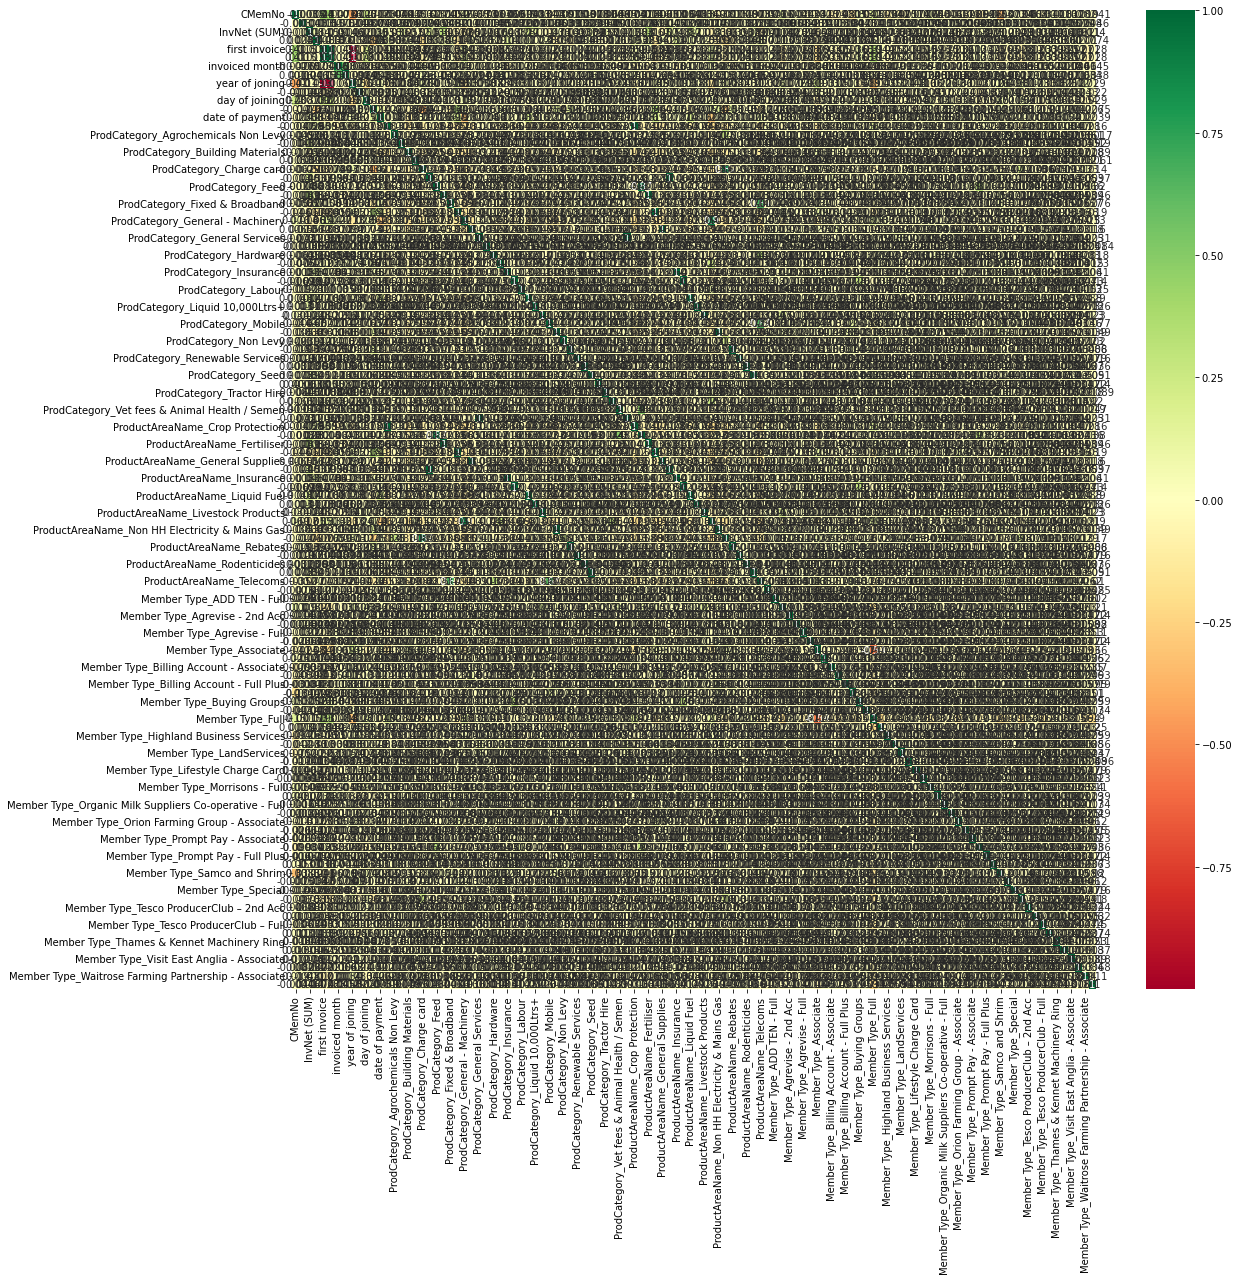

In [125]:
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [95]:
print(selection.feature_importances_)

[1.24815915e-01 4.91019828e-02 4.33915787e-02 9.88680609e-02
 1.28025279e-01 8.19138789e-02 9.88738826e-02 5.10041048e-02
 7.54377190e-02 8.29003778e-02 4.86832088e-02 3.47399323e-02
 3.22329326e-03 1.03510068e-03 0.00000000e+00 7.47793292e-03
 8.07746699e-04 5.24628049e-03 0.00000000e+00 7.50907200e-04
 9.76095652e-05 1.50531216e-03 3.24536354e-03 6.38161628e-03
 1.53903264e-03 1.86833241e-04 0.00000000e+00 1.81410830e-03
 2.78567285e-03 1.18540039e-04 3.06337027e-04 1.56069694e-05
 1.34773812e-03 0.00000000e+00 5.89604069e-04 1.57949383e-03
 2.54483503e-04 1.27928452e-03 4.22744238e-04 0.00000000e+00
 0.00000000e+00 2.61678981e-04 5.26735219e-05 4.80849247e-04
 1.65332683e-03 8.63281191e-04 2.50319792e-04 3.13122306e-03
 3.17482259e-04 6.56387731e-05 3.55016420e-03 1.77661973e-03
 1.56069694e-05 3.29979745e-04 2.89056463e-04 1.80688384e-03
 0.00000000e+00 5.71638870e-04 3.44829251e-03 3.15768933e-04
 1.91181315e-03 3.68868326e-04 0.00000000e+00 0.00000000e+00
 3.04842992e-04 1.214977

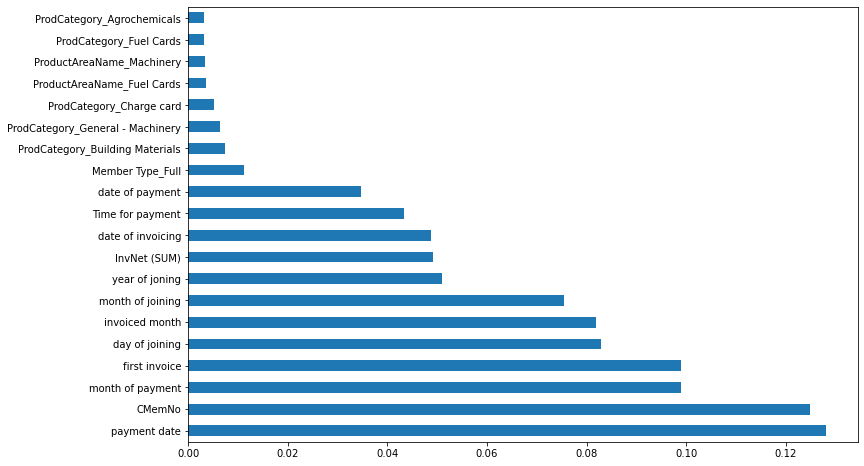

In [96]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [98]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
y_pred = reg_rf.predict(X_test)

In [100]:
reg_rf.score(X_train, y_train)

0.9458928448237459

In [101]:
reg_rf.score(X_test, y_test)

0.6846431162453264

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


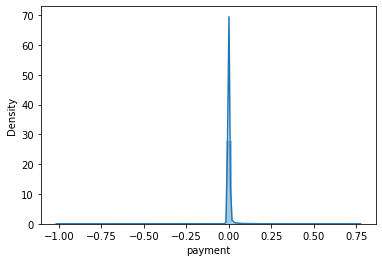

In [102]:
sns.distplot(y_test-y_pred)
plt.show()

In [231]:
for col_name in data_train.columns: 
    print(col_name)

CMemNo
payment
InvNet (SUM)
Time for payment
first invoice
payment date
invoiced month
month of payment
year of joning
month of joining
day of joining
date of invoicing
date of payment
town freq
ProdCategory_Agrochemicals
ProdCategory_Agrochemicals Non Levy
ProdCategory_Build Materials Non Levy
ProdCategory_Building Materials
ProdCategory_Capital
ProdCategory_Charge card
ProdCategory_Electricity HH
ProdCategory_Feed
ProdCategory_Fertiliser
ProdCategory_Fixed & Broadband
ProdCategory_Fuel Cards
ProdCategory_General - Machinery
ProdCategory_General - Supplies
ProdCategory_General Services
ProdCategory_General Supplies Non Levy
ProdCategory_Hardware
ProdCategory_Hire
ProdCategory_Insurance
ProdCategory_LPG & Solid fuels
ProdCategory_Labour
ProdCategory_Liquid
ProdCategory_Liquid 10,000Ltrs+
ProdCategory_Livestock Products
ProdCategory_Mobile
ProdCategory_Non HH, mains gas, MOP
ProdCategory_Non Levy
ProdCategory_Rebates to Members
ProdCategory_Renewable Services
ProdCategory_Rodenticides
P

## Random Forest Classifier

In [103]:
from sklearn import metrics

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.004016000000000001
MSE: 0.0014127200000000001
RMSE: 0.03758616766843888


In [105]:
metrics.r2_score(y_test, y_pred)

0.6846431162453264

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()

In [108]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [109]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)

In [110]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 1.4min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 1.4min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 1.4min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=  30.1s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100, 1200]},
                   random_state=42, verbose=2)

In [111]:
best_random=random_cv.best_estimator_

In [112]:
prediction_cv=best_random.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
print('the accuracy score of the ML that is built:',accuracy_score(y_test,prediction_cv))

the accuracy score of the ML that is built: 0.99745


In [115]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [117]:
filename = 'finalized_model.sav'

In [251]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(random_cv, filename)

['finalized_model.sav']

In [118]:

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print('the accuracy score of the ML that is built:',result)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Member Type_Ramsak Machinery Ring
Feature names seen at fit time, yet now missing:
- town freq

  warnings.warn(message, FutureWarning)


the accuracy score of the ML that is built: 0.9955


In [119]:
import pickle
# open a file, where you ant to store the data
file = open('churn.pkl', 'wb')

# dump information to that file
pickle.dump(random_cv, file)

In [120]:
df6

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0      662670        1          1.00                28           3126   
1      615203        1          0.28                26           2039   
2      663084        1        210.00                50           2949   
3      662364        1         86.28                64           3700   
4      693392        1        134.59                26           8018   
...       ...      ...           ...               ...            ...   
99995  662273        1         85.41                28           3879   
99996  662383        1        -35.42                26           3523   
99997  663587        1         20.16                49           2029   
99998  671001        1      -1020.00                33           9670   
99999  663463        1         93.95                32           2014   

       payment date  invoiced month  month of payment  year of joning  \
0              3154               2                 3            2007   
1              2065              12                 1            2011   
2              2999              11                12            2008   
3              3764               7                 9            2006   
4              8044               7                 8            1994   
...             ...             ...               ...             ...   
99995          3907               9                10            2006   
99996          3549               4                 5            2006   
99997          2078               9                10            2011   
99998          9703               6                 7            1990   
99999          2046               2                 3            2010   

       month of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0                     8  ...                                         0   
1                     6  ...                                         0   
2                    10  ...                                         0   
3                     6  ...                                         0   
4                     8  ...                                         0   
...                 ...  ...                                       ...   
99995                 2  ...                                         0   
99996                 9  ...                                         0   
99997                 2  ...                                         0   
99998                 1  ...                                         0   
99999                 8  ...                                         0   

       Member Type_Tesco ProducerClub – Associate  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
99995                                           0   
99996                                           0   
99997                                           0   
99998                                           0   
99999                                           0   

       Member Type_Tesco ProducerClub – Full  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
99995                                      0   
99996                                      0   
99997                                      0   
99998                                      0   
99999                                      0   

       Member Type_Tesco ProducerClub – Full Plus  \
0                                               0   
1                                           

In [121]:
X

CMemNo  InvNet (SUM)  Time for payment  first invoice  payment date  \
0      0.585173      0.446773          0.139092       0.236735      0.235959   
1      0.057686      0.446768          0.138116       0.188591      0.187686   
2      0.589774      0.448088          0.149829       0.228895      0.229088   
3      0.581773      0.447310          0.156662       0.262158      0.262999   
4      0.926578      0.447614          0.138116       0.453406      0.452724   
...         ...           ...               ...            ...           ...   
99995  0.580762      0.447304          0.139092       0.270086      0.269338   
99996  0.581984      0.446544          0.138116       0.254318      0.253469   
99997  0.595364      0.446894          0.149341       0.188148      0.188262   
99998  0.677753      0.440348          0.141532       0.526575      0.526264   
99999  0.593986      0.447358          0.141044       0.187483      0.186843   

       invoiced month  month of payment  year of joning  month of joining  \
0            0.090909          0.181818        0.754098          0.636364   
1            1.000000          0.000000        0.819672          0.454545   
2            0.909091          1.000000        0.770492          0.818182   
3            0.545455          0.727273        0.737705          0.454545   
4            0.545455          0.636364        0.540984          0.636364   
...               ...               ...             ...               ...   
99995        0.727273          0.818182        0.737705          0.090909   
99996        0.272727          0.363636        0.737705          0.727273   
99997        0.727273          0.818182        0.819672          0.090909   
99998        0.454545          0.545455        0.475410          0.000000   
99999        0.090909          0.181818        0.803279          0.636364   

       day of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0            0.266667  ...                                       0.0   
1            0.033333  ...                                       0.0   
2            0.466667  ...                                       0.0   
3            0.200000  ...                                       0.0   
4            0.566667  ...                                       0.0   
...               ...  ...                                       ...   
99995        0.500000  ...                                       0.0   
99996        0.200000  ...                                       0.0   
99997        0.533333  ...                                       0.0   
99998        0.000000  ...                                       0.0   
99999        0.600000  ...                                       0.0   

       Member Type_Tesco ProducerClub – Associate  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
99995                                         0.0   
99996                                         0.0   
99997                                         0.0   
99998                                         0.0   
99999                                         0.0   

       Member Type_Tesco ProducerClub – Full  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
99995                                    0.0   
99996                                    0.0   
99997                                    0.0   
99998                                    0.0   
99999                                    0.0   

       Member Type_Tesco ProducerClub – Full

In [122]:
y.value_counts()

1.0    99571
0.0      429
Name: payment, dtype: int64